# 데이터분석프로그래밍 13주차 실습

## 실습 시작 전 유의사항

※ 상단 메뉴에서 '**파일 - 드라이브에 사본 저장**' 진행 후 시작하세요.\
※ 프로젝트 제목 뒤에 본인의 이름과 학번을 작성하세요. `ex) DataAnalysisProgramming_#01_202312345_정재호.ipynb`

## 실습 개요
- 분류 (Classification)
  - Decision Tree
  - Support Vector Machine
- 회귀 (Regression)

---

## 분류 (2)
데이터가 어떤 레이블에 해당될지 예측하는 작업입니다.

다양한 분류 기법들을 알아보고, 이를 sklearn에서 제공하는 도구를 통해 실습해보겠습니다.

### 결정 트리 (Decision Tree)
데이터를 기준에 따라 둘로 쪼개는 작업을 반복하여 클래스를 결정하는 분류 기법입니다.

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt

# 데이터셋 준비
iris = datasets.load_iris() # data와 target으로 이뤄진 sklearn 데이터셋
X = iris.data    # sepal length와 sepal width를 feature로 사용
y = iris.target

In [ ]:
from sklearn.model_selection import train_test_split

# X와 y 집합을 학습용과 테스트용으로 분리 (7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# sklearn.tree에서는 결정 트리를 통해 분류를 수행할 수 있도록 DecisionTreeClassifier를 제공합니다.

**fit 메소드**를 통해 데이터를 분류하는 기준을 정하고, **predict 메소드**를 사용하여 데이터가 학습한 기준으로 분류됩니다.

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# DecisionTreeClassifier 객체를 생성
# 최대 깊이와 최대 잎노드 수 등을 정해줄 수 있습니다.
dt_tree = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=4)

# 모델 학습
dt_tree.fit(X_train, y_train)

# 클래스 예측
predictions = dt_tree.predict(X_test)
acc = (predictions == y_test).sum() / len(y_test)
print(f'정확도: {100*acc:.2f}%')

# 정확도는 모델의 score 메소드를 통해서도 확인할 수 있습니다.
# 이전에 배운 다른 모델들에서도 사용가능합니다.
acc = dt_tree.score(X_test, y_test)
print(f'(score: {100*acc:.2f}%)')

정확도: 97.78%
(score: 97.78%)


실제 결정 트리의 형태(분류 기준, 비율 등)은 sklearn.tree의 plot_tree 메소드를 통해\
원하는 모델을 시각화함으로써 볼 수 있습니다.

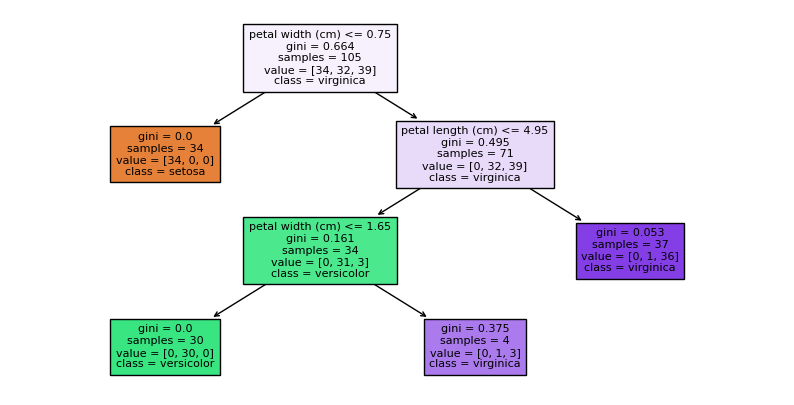

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, ax = plt.subplots(figsize=(10, 5))

tree.plot_tree(dt_tree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, ax=ax, fontsize=8)

plt.show()

### SVM (Support Vector Machine)

SVM은 마진(margin)을 최대로하는 결정 경계를 찾는 분류 기법입니다.

SVM의 특징으로는, 다양한 커널을 사용할 수 있어서 데이터의 형태에 맞게 분류기를 설계할 수 있습니다. 그리고, C나 gamma 등을 조절하여 결정 경계의 유연성을 조절할 수 있습니다.

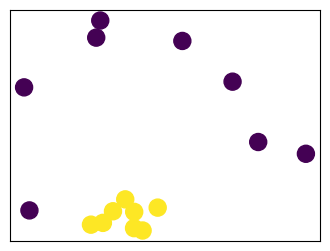

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt

# 데이터셋 준비
X, y = datasets.make_moons(n_samples=16, noise=0.2, random_state=2)
X[y==0] *= 5
X[y==1] = datasets.make_blobs(n_samples=8, n_features=2, centers=1, center_box=[3, -4.5], cluster_std=1, random_state=14)[0]

fig, ax = plt.subplots(figsize=(4, 3))
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=150)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

def plot_decisionBoundary(model, X, y, ax=None, show=True):
  if not ax:
    _, ax = plt.subplots(figsize=(4, 3))

  DecisionBoundaryDisplay.from_estimator(model, X, ax=ax,
      response_method="predict", plot_method="pcolormesh", alpha=0.3)

  DecisionBoundaryDisplay.from_estimator(model, X, ax=ax,
      response_method="decision_function", plot_method="contour",
      levels=[-1, 0, 1], colors=["k", "k", "k"], linestyles=["--", "-", "--"])

  ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
      s=175, facecolors="none", edgecolors="k")

  ax.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors="k")
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'SVC with {model.kernel} kernel (C={model.C})')

  if show:
    plt.show()

sklearn.svm에서는 SVM을 통한 분류를 수행할 수 있도록 SVC를 제공합니다.

마찬가지로 fit과 predict 메소드를 사용할 수 있지만,\
이번에는 커널들에 따라 달라지는 결정 경계를 확인해보겠습니다.

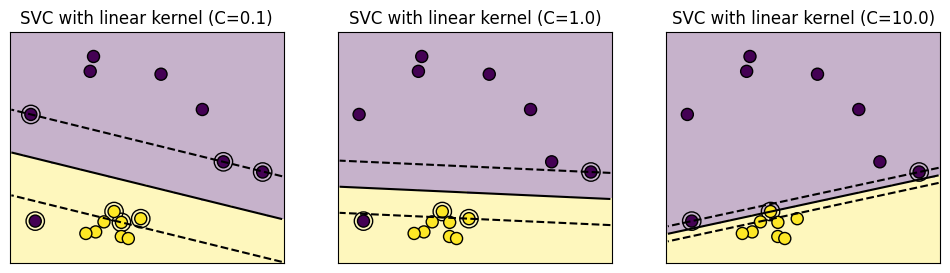

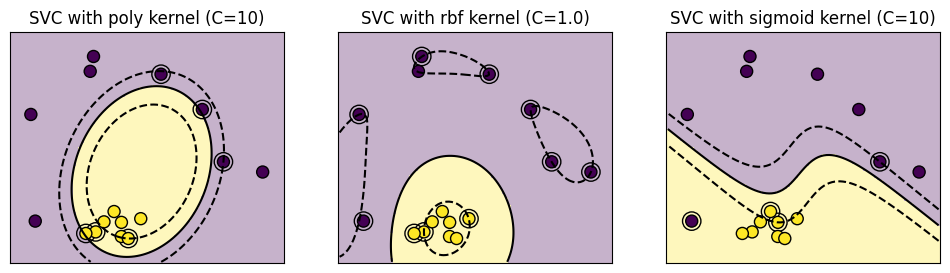

In [ ]:
from sklearn.svm import SVC

# C를 변화시킴에 따라 달라지는 결정 경계
fig, sub = plt.subplots(1, 3, figsize=(12, 3))

linear_model = SVC(kernel='linear', C=0.1).fit(X, y)
plot_decisionBoundary(linear_model, X, y, ax=sub[0], show=False)

linear_model = SVC(kernel='linear').fit(X, y)
plot_decisionBoundary(linear_model, X, y, ax=sub[1], show=False)

linear_model = SVC(kernel='linear', C=10.).fit(X, y)
plot_decisionBoundary(linear_model, X, y, ax=sub[2])

# 비선형 커널을 사용한 비선형 SVM
#  + 다양한 매개변수(degree, gamma, C)들을 조절해 보았다.
fig, sub = plt.subplots(1, 3, figsize=(12, 3))

poly_model = SVC(kernel='poly', degree=2, C=10).fit(X, y)
plot_decisionBoundary(poly_model, X, y, ax=sub[0], show=False)

rbf_model = SVC(kernel='rbf', gamma=0.1).fit(X, y)
plot_decisionBoundary(rbf_model, X, y, ax=sub[1], show=False)

rbf_model = SVC(kernel='sigmoid', C=10).fit(X, y)
plot_decisionBoundary(rbf_model, X, y, ax=sub[2])

#predictions = linear_model.predict(X_test)
#acc = (predictions == y_test).sum() / len(y_test)
#print(f'정확도: {100*acc:.2f}%')

### Confusion Matrix
다음으로는 분류 모델의 성능을 측정하는 방법 중 하나인 Confusion matrix입니다.

모델이 예측한 레이블과 정답 레이블을 바탕으로 만들 수 있습니다.

sklearn.metrics의 confusion_matrix와 ConfusionMatrixDisplay 메소드를 통해 시각화할 수 있습니다.

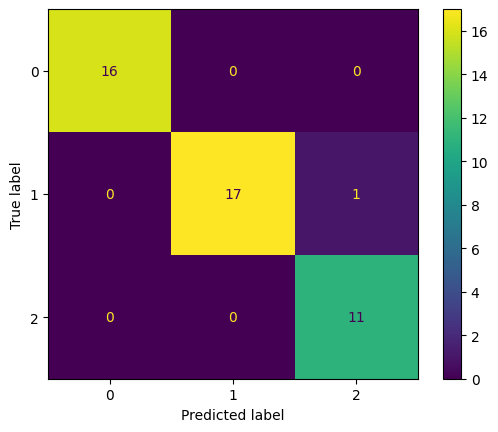

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cm).plot()
plt.show()

## 회귀

데이터의 연속적인 값을 예측하는 작업입니다.\
하나의 변수(y)가 다른 변수들(X)에게 어떻게 영향을 받는지 이해하는 데 사용할 수 있습니다.

### Linear Regression
데이터 간의 선형적인 관계를 포착하고 싶을 때 사용하는 회귀 기법입니다.

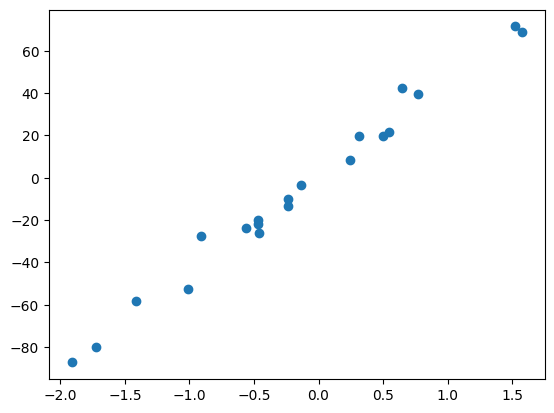

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터셋 준비
X, y = datasets.make_regression(n_samples=20, n_features=1, noise=5, random_state=42)
plt.scatter(X, y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

sklearn.linear_model에서는 선형 회귀 수행할 수 있도록 LinearRegression을 제공합니다.

마찬가지로 fit과 predict 메소드를 통해 실습을 진행해봅시다.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

regr = LinearRegression()

regr.fit(X_train, y_train)

predictions = regr.predict(X_test)

print("실제 정답", y_test, sep='\n')
print("모델의 예측", predictions, sep='\n')

실제 정답
[ 42.33657029  -3.31721743 -87.28660841  19.50626679 -10.06793677
 -58.44273406]
모델의 예측
[ 29.80253875  -5.96648783 -86.74816999  22.93163439 -10.33043773
 -63.94852808]


맞았다, 틀렸다를 확실히 할 수 있는 분류 문제와는 다르게\
회귀는 실제 값과 예측 값 간의 오차를 통해 성능을 측정합니다.

대표적으로, 오차들의 제곱을 평균한 MSE이 있고, 평균과 오차를 이용한 R2 score가 있습니다.

평균제곱오차: 34.42
R2 score: 0.98


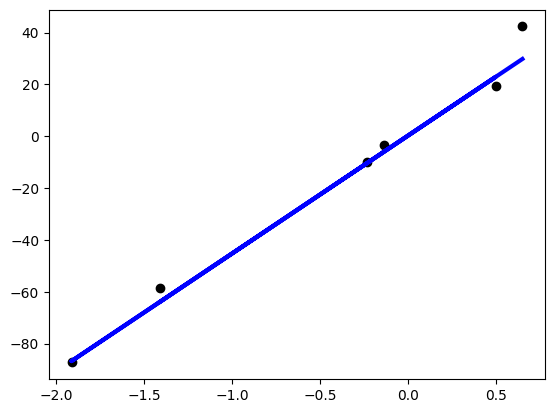

In [ ]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'평균제곱오차: {mse:.2f}') # 작을 수록 오차가 낮은 모델
print(f'R2 score: {r2:.2f}') # 1에 가까울수록 좋은 모델

plt.scatter(X_test, y_test, color='k')
plt.plot(X_test, predictions, color='b', linewidth=3)

plt.show()

## 실습 종료 전 유의사항

※ 완료 시 우측 상단 프로필 옆 '**공유 - 액세스를 *링크가 있는 모든 사용자*로 전환**' 후 복사한 링크를 이루리 과제 란에 업로드 하세요.

<img src="https://drive.google.com/uc?id=1Zj1FKIz0sanqUfkfr3scp5M-dDgMFxYQ" height=300>

</br>

※ 추가로 상단 메뉴 '**파일 - 다운로드 - .ipynb**' 로 다운로드 후 첨부 파일로 업로드 하세요.

※ 즉, 과제의 텍스트란에는 링크를, 파일 첨부란에는 .ipynb 파일을 제출하십시오.